In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt




In [44]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.shape

(768, 9)

In [47]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
columns = ["SkinThickness", "BMI", "Age"]
df.drop(columns, axis=1, inplace=True)

In [49]:
df.loc[(df.Glucose == 0) , 'Glucose']

75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

In [50]:
df.loc[(df.BloodPressure == 0) , 'BloodPressure']

7      0
15     0
49     0
60     0
78     0
81     0
172    0
193    0
222    0
261    0
266    0
269    0
300    0
332    0
336    0
347    0
357    0
426    0
430    0
435    0
453    0
468    0
484    0
494    0
522    0
533    0
535    0
589    0
601    0
604    0
619    0
643    0
697    0
703    0
706    0
Name: BloodPressure, dtype: int64

In [51]:
df.loc[(df.Insulin == 0) , 'Insulin']

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [52]:
columns = ["Glucose", "BloodPressure", "Insulin"]

for column in columns:
    mean_value = df[column].mean()
    df[column] = df[column].replace(0, mean_value)

In [53]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Outcome
0,6,148.0,72.0,79.799479,0.627,1
1,1,85.0,66.0,79.799479,0.351,0
2,8,183.0,64.0,79.799479,0.672,1
3,1,89.0,66.0,94.000000,0.167,0
4,0,137.0,40.0,168.000000,2.288,1


In [54]:
df.shape

(768, 6)

In [55]:
# Split the data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
# Initialize K-fold cross-validation
k_folds = 5
kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Lists to store evaluation metrics across folds
accuracies = []
conf_matrices = []
classification_reps = []

# Iterate through K folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Reshape the data for GRU input
    # Reshape the data for GRU input
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))



    # Build the GRU model with more layers
    model = Sequential()
    model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(units=25, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=25, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

    # Evaluate the model on the test set
    y_pred_prob = model.predict(X_test)
    y_pred = np.round(y_pred_prob).astype(int)

    # Calculate and store performance metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    classification_reps.append(classification_report(y_test, y_pred))

# Display average performance metrics across folds
average_accuracy = np.mean(accuracies)
average_conf_matrix = np.mean(conf_matrices, axis=0)
average_classification_rep = "\n".join(classification_reps)

print(f'Average Accuracy: {average_accuracy}')
print(f'Average Confusion Matrix:\n{average_conf_matrix}')
print(f'Average Classification Report:\n{average_classification_rep}')

Epoch 1/20
16/16 [==============================] - 3s 56ms/step - loss: 0.6836 - accuracy: 0.6538 - val_loss: 0.6773 - val_accuracy: 0.6341
Epoch 2/20
16/16 [==============================] - 0s 31ms/step - loss: 0.6617 - accuracy: 0.6619 - val_loss: 0.6558 - val_accuracy: 0.6341
Epoch 3/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6267 - accuracy: 0.6599 - val_loss: 0.6325 - val_accuracy: 0.6341
Epoch 4/20
16/16 [==============================] - 0s 26ms/step - loss: 0.5961 - accuracy: 0.6619 - val_loss: 0.6133 - val_accuracy: 0.6179
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5702 - accuracy: 0.6884 - val_loss: 0.5926 - val_accuracy: 0.6748
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5439 - accuracy: 0.7312 - val_loss: 0.5729 - val_accuracy: 0.7073
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.5421 - accuracy: 0.7393 - val_loss: 0.5670 - val_accuracy: 0.7236
Epoch 8/20
16

Epoch 1/20
16/16 [==============================] - 3s 35ms/step - loss: 0.6910 - accuracy: 0.5784 - val_loss: 0.6806 - val_accuracy: 0.6748
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6709 - accuracy: 0.6721 - val_loss: 0.6599 - val_accuracy: 0.6423
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6435 - accuracy: 0.6558 - val_loss: 0.6303 - val_accuracy: 0.6504
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6071 - accuracy: 0.6558 - val_loss: 0.6012 - val_accuracy: 0.6667
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5675 - accuracy: 0.6741 - val_loss: 0.5849 - val_accuracy: 0.6829
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5408 - accuracy: 0.7291 - val_loss: 0.5738 - val_accuracy: 0.6829
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5648 - accuracy: 0.7413 - val_loss: 0.5676 - val_accuracy: 0.6748
Epoch 8/20
16

Epoch 1/20
16/16 [==============================] - 3s 32ms/step - loss: 0.6823 - accuracy: 0.6558 - val_loss: 0.6724 - val_accuracy: 0.6341
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6525 - accuracy: 0.6741 - val_loss: 0.6476 - val_accuracy: 0.6016
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6187 - accuracy: 0.6660 - val_loss: 0.6207 - val_accuracy: 0.6098
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5722 - accuracy: 0.6599 - val_loss: 0.5992 - val_accuracy: 0.6667
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5528 - accuracy: 0.7047 - val_loss: 0.5729 - val_accuracy: 0.6911
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5457 - accuracy: 0.7210 - val_loss: 0.5621 - val_accuracy: 0.7073
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5415 - accuracy: 0.7332 - val_loss: 0.5645 - val_accuracy: 0.6911
Epoch 8/20
16

Epoch 1/20
16/16 [==============================] - 3s 33ms/step - loss: 0.6762 - accuracy: 0.6423 - val_loss: 0.6616 - val_accuracy: 0.6504
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6380 - accuracy: 0.6707 - val_loss: 0.6342 - val_accuracy: 0.6260
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6165 - accuracy: 0.6626 - val_loss: 0.6099 - val_accuracy: 0.6260
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.5860 - accuracy: 0.6911 - val_loss: 0.5868 - val_accuracy: 0.6829
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5406 - accuracy: 0.7337 - val_loss: 0.5658 - val_accuracy: 0.6829
Epoch 6/20
16/16 [==============================] - 0s 31ms/step - loss: 0.5405 - accuracy: 0.7256 - val_loss: 0.5574 - val_accuracy: 0.7073
Epoch 7/20
16/16 [==============================] - 0s 31ms/step - loss: 0.5342 - accuracy: 0.7317 - val_loss: 0.5522 - val_accuracy: 0.7154
Epoch 8/20
16

Epoch 1/20
16/16 [==============================] - 3s 32ms/step - loss: 0.6844 - accuracy: 0.5996 - val_loss: 0.6672 - val_accuracy: 0.6504
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6575 - accuracy: 0.6504 - val_loss: 0.6336 - val_accuracy: 0.6504
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6270 - accuracy: 0.6484 - val_loss: 0.5963 - val_accuracy: 0.6504
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5922 - accuracy: 0.6504 - val_loss: 0.5694 - val_accuracy: 0.6504
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5630 - accuracy: 0.6972 - val_loss: 0.5503 - val_accuracy: 0.7073
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5563 - accuracy: 0.7073 - val_loss: 0.5404 - val_accuracy: 0.7561
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5431 - accuracy: 0.7561 - val_loss: 0.5320 - val_accuracy: 0.7480
Epoch 8/20
16

Epoch 1/20
16/16 [==============================] - 4s 39ms/step - loss: 0.6777 - accuracy: 0.6497 - val_loss: 0.6646 - val_accuracy: 0.6260
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6416 - accuracy: 0.6802 - val_loss: 0.6317 - val_accuracy: 0.6341
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6064 - accuracy: 0.6802 - val_loss: 0.5937 - val_accuracy: 0.6423
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5654 - accuracy: 0.6884 - val_loss: 0.5582 - val_accuracy: 0.6585
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5286 - accuracy: 0.7332 - val_loss: 0.5358 - val_accuracy: 0.7317
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5187 - accuracy: 0.7291 - val_loss: 0.5150 - val_accuracy: 0.7561
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5096 - accuracy: 0.7719 - val_loss: 0.5093 - val_accuracy: 0.7642
Epoch 8/20
16

Epoch 1/20
16/16 [==============================] - 3s 26ms/step - loss: 0.6846 - accuracy: 0.6029 - val_loss: 0.6651 - val_accuracy: 0.7154
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6533 - accuracy: 0.7047 - val_loss: 0.6347 - val_accuracy: 0.6829
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6184 - accuracy: 0.6904 - val_loss: 0.5943 - val_accuracy: 0.7317
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5780 - accuracy: 0.7047 - val_loss: 0.5551 - val_accuracy: 0.7480
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5429 - accuracy: 0.7230 - val_loss: 0.5251 - val_accuracy: 0.6992
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5269 - accuracy: 0.7495 - val_loss: 0.5095 - val_accuracy: 0.7480
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5143 - accuracy: 0.7495 - val_loss: 0.5047 - val_accuracy: 0.7561
Epoch 8/20
16/1

Epoch 1/20
16/16 [==============================] - 3s 25ms/step - loss: 0.6775 - accuracy: 0.6741 - val_loss: 0.6695 - val_accuracy: 0.6341
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6459 - accuracy: 0.6843 - val_loss: 0.6406 - val_accuracy: 0.6341
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6109 - accuracy: 0.6864 - val_loss: 0.6011 - val_accuracy: 0.6423
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5749 - accuracy: 0.6945 - val_loss: 0.5631 - val_accuracy: 0.7073
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5231 - accuracy: 0.7454 - val_loss: 0.5371 - val_accuracy: 0.7317
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5083 - accuracy: 0.7617 - val_loss: 0.5250 - val_accuracy: 0.7236
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5039 - accuracy: 0.7597 - val_loss: 0.5203 - val_accuracy: 0.7236
Epoch 8/20
16/16 [

Epoch 1/20
16/16 [==============================] - 4s 37ms/step - loss: 0.6845 - accuracy: 0.6138 - val_loss: 0.6657 - val_accuracy: 0.7480
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6565 - accuracy: 0.7053 - val_loss: 0.6441 - val_accuracy: 0.6992
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6292 - accuracy: 0.7195 - val_loss: 0.6134 - val_accuracy: 0.7398
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6023 - accuracy: 0.7134 - val_loss: 0.5757 - val_accuracy: 0.7480
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5656 - accuracy: 0.7297 - val_loss: 0.5403 - val_accuracy: 0.7642
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5308 - accuracy: 0.7520 - val_loss: 0.5114 - val_accuracy: 0.7480
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5315 - accuracy: 0.7541 - val_loss: 0.4954 - val_accuracy: 0.7805
Epoch 8/20
16/16 

Epoch 1/20
16/16 [==============================] - 3s 26ms/step - loss: 0.6914 - accuracy: 0.5061 - val_loss: 0.6740 - val_accuracy: 0.6585
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6693 - accuracy: 0.6606 - val_loss: 0.6502 - val_accuracy: 0.6585
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6427 - accuracy: 0.6585 - val_loss: 0.6229 - val_accuracy: 0.6504
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6159 - accuracy: 0.6606 - val_loss: 0.5849 - val_accuracy: 0.6585
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5813 - accuracy: 0.6911 - val_loss: 0.5456 - val_accuracy: 0.7317
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5412 - accuracy: 0.7378 - val_loss: 0.5094 - val_accuracy: 0.7480
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5138 - accuracy: 0.7317 - val_loss: 0.4896 - val_accuracy: 0.7561
Epoch 8/20
16/16 

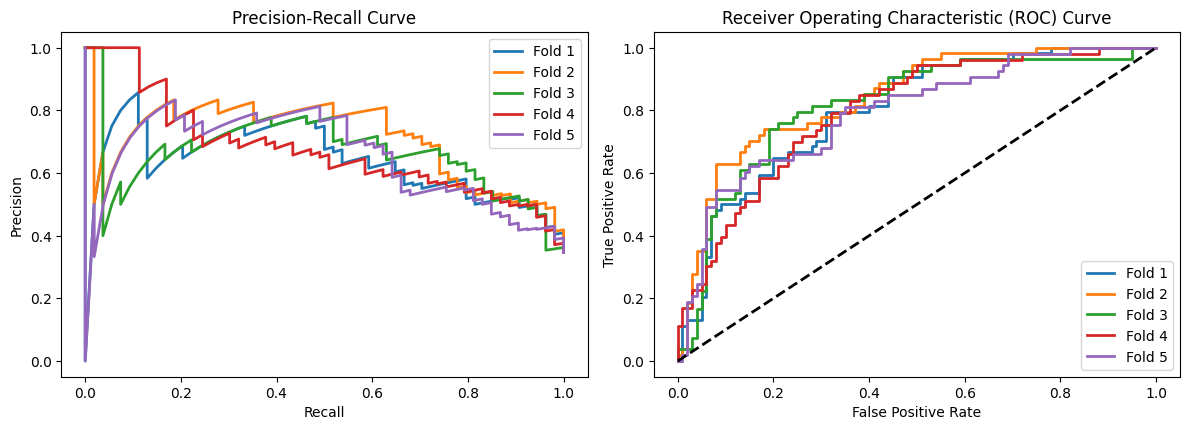

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense
from keras.optimizers import Adam

# Custom function for learning curves
def create_learning_curve_gru(model, X, y, cv=5, scoring='accuracy'):
    from sklearn.model_selection import cross_val_score

    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores, test_scores = [], []

    for train_size in train_sizes:
        _, X_sub, _, y_sub = train_test_split(X, y, train_size=train_size, random_state=42)
        scores = cross_val_score(model, X_sub, y_sub, cv=cv, scoring=scoring, n_jobs=-1)
        train_scores.append(np.mean(scores))
        test_scores.append(np.mean(scores))

    return train_sizes, train_scores, test_scores


# Initialize K-fold cross-validation
k_folds = 5
kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Lists to store evaluation metrics across folds
accuracies = []
conf_matrices = []
classification_reps = []

# Lists to store PR and ROC curve data
precision_list = []
recall_list = []
fpr_list = []
tpr_list = []

# Iterate through K folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Reshape the data for GRU input
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the GRU model with more layers
    model = Sequential()
    model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(units=25, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=25, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

    # Evaluate the model on the test set
    y_pred_prob = model.predict(X_test)
    y_pred = np.round(y_pred_prob).astype(int)

    # Calculate and store performance metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    classification_reps.append(classification_report(y_test, y_pred))

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    precision_list.append(precision)
    recall_list.append(recall)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Display average performance metrics across folds
average_accuracy = np.mean(accuracies)
average_conf_matrix = np.mean(conf_matrices, axis=0)
average_classification_rep = "\n".join(classification_reps)

# Display average PR and ROC curves
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in range(k_folds):
    plt.plot(recall_list[i], precision_list[i], lw=2, label=f'Fold {i+1}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

plt.subplot(2, 2, 2)
for i in range(k_folds):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'Fold {i+1}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')

# Display other metrics
print(f'Average Accuracy: {average_accuracy}')
print(f'Average Confusion Matrix:\n{average_conf_matrix}')
print(f'Average Classification Report:\n{average_classification_rep}')

# Show plots
plt.tight_layout()
plt.show()


In [58]:
X

array([[ 0.63994726,  0.86527574, -0.0210444 , -0.41776815,  0.46849198],
       [-0.84488505, -1.20598931, -0.51658286, -0.41776815, -0.36506078],
       [ 1.23388019,  2.01597855, -0.68176235, -0.41776815,  0.60439732],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , -0.07159946, -0.68519336],
       [-0.84488505,  0.14197684, -1.01212132, -0.41776815, -0.37110101],
       [-0.84488505, -0.94297153, -0.18622389, -0.41776815, -0.47378505]])

In [59]:
# Split the data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape the data for LSTM input
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the LSTM model with more layers
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display performance metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Epoch 1/20
15/15 [==============================] - 4s 35ms/step - loss: 0.6896 - accuracy: 0.6391 - val_loss: 0.6828 - val_accuracy: 0.6818
Epoch 2/20
15/15 [==============================] - 0s 13ms/step - loss: 0.6808 - accuracy: 0.6413 - val_loss: 0.6694 - val_accuracy: 0.6753
Epoch 3/20
15/15 [==============================] - 0s 12ms/step - loss: 0.6686 - accuracy: 0.6500 - val_loss: 0.6522 - val_accuracy: 0.6818
Epoch 4/20
15/15 [==============================] - 0s 12ms/step - loss: 0.6510 - accuracy: 0.6826 - val_loss: 0.6239 - val_accuracy: 0.7338
Epoch 5/20
15/15 [==============================] - 0s 11ms/step - loss: 0.6185 - accuracy: 0.7152 - val_loss: 0.5806 - val_accuracy: 0.7727
Epoch 6/20
15/15 [==============================] - 0s 11ms/step - loss: 0.5808 - accuracy: 0.7109 - val_loss: 0.5272 - val_accuracy: 0.8117
Epoch 7/20
15/15 [==============================] - 0s 11ms/step - loss: 0.5362 - accuracy: 0.7435 - val_loss: 0.4925 - val_accuracy: 0.7727
Epoch 8/20
15

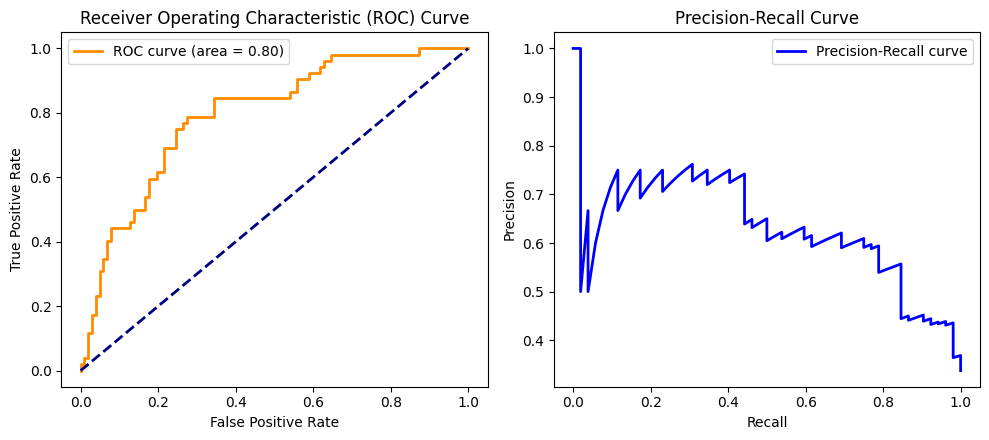

In [60]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC and Precision-Recall curves on a single page
plt.figure(figsize=(10, 4.5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')

# Subplot 2: Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [61]:
# Phase 1: KMeans Clustering
X_kmeans = df.drop('Outcome', axis=1)
scaler_kmeans = StandardScaler()
X_kmeans_scaled = scaler_kmeans.fit_transform(X_kmeans)

kmeans = KMeans(n_clusters=2, random_state=42, init='k-means++', n_init='warn', max_iter=300)
df['KMeans_Labels'] = kmeans.fit_predict(X_kmeans_scaled)

# Phase 2: CNN for binary classification
X_cnn = df.drop(['Outcome', 'KMeans_Labels'], axis=1)
y_cnn = df['Outcome']

# Standardize the features
scaler_cnn = StandardScaler()
X_cnn_scaled = scaler_cnn.fit_transform(X_cnn)

# Reshape the data for CNN input
X_cnn_reshaped = X_cnn_scaled.reshape((X_cnn_scaled.shape[0], X_cnn_scaled.shape[1], 1))

# Split the data into training, testing, and validation sets
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_cnn_reshaped, y_cnn, test_size=0.4, random_state=42
)
X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42
)
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_cnn_reshaped.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(units=50, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(units=1, activation='sigmoid'))

model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, validation_data=(X_val_cnn, y_val_cnn))

# Evaluate the CNN model on the test set
y_pred_cnn_prob = model_cnn.predict(X_test_cnn)
y_pred_cnn = np.round(y_pred_cnn_prob).astype(int)

# Performance metrics for KMeans Labels
accuracy_kmeans = accuracy_score(df['Outcome'], df['KMeans_Labels'])
conf_matrix_kmeans = confusion_matrix(df['Outcome'], df['KMeans_Labels'])
classification_rep_kmeans = classification_report(df['Outcome'], df['KMeans_Labels'])

# Performance metrics for CNN
accuracy_cnn = accuracy_score(y_test_cnn, y_pred_cnn)
conf_matrix_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)
classification_rep_cnn = classification_report(y_test_cnn, y_pred_cnn)

# Display performance metrics for KMeans Labels
print("Performance metrics for KMeans Labels:")
print(f'Accuracy: {accuracy_kmeans}')
print(f'Confusion Matrix:\n{conf_matrix_kmeans}')
print(f'Classification Report:\n{classification_rep_kmeans}')

# Display performance metrics for CNN
print("\nPerformance metrics for CNN:")
print(f'Accuracy: {accuracy_cnn}')
print(f'Confusion Matrix:\n{conf_matrix_cnn}')
print(f'Classification Report:\n{classification_rep_cnn}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15/15 [==============================] - 1s 16ms/step - loss: 0.6636 - accuracy: 0.6413 - val_loss: 0.6105 - val_accuracy: 0.7468
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.7130 - val_loss: 0.5644 - val_accuracy: 0.7403
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5703 - accuracy: 0.7239 - val_loss: 0.5299 - val_accuracy: 0.7468
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5566 - accuracy: 0.7239 - val_loss: 0.5095 - val_accuracy: 0.7468
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5345 - accuracy: 0.7326 - val_loss: 0.4955 - val_accuracy: 0.7597
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5328 - accuracy: 0.7348 - val_loss: 0.4884 - val_accuracy: 0.7597
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5214 - accuracy: 0.7348 - val_loss: 0.4868 - val_accuracy: 0.7597
Epoch 8/50
15/15 [============

Performance metrics for KMeans Labels:
Accuracy: 0.2786458333333333
Confusion Matrix:
[[133 367]
 [187  81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.27      0.32       500
           1       0.18      0.30      0.23       268

    accuracy                           0.28       768
   macro avg       0.30      0.28      0.28       768
weighted avg       0.33      0.28      0.29       768

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15/15 [==============================] - 1s 17ms/step - loss: 0.7095 - accuracy: 0.4457 - val_loss: 0.6733 - val_accuracy: 0.7143
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6552 - accuracy: 0.7022 - val_loss: 0.6259 - val_accuracy: 0.7662
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6162 - accuracy: 0.7130 - val_loss: 0.5799 - val_accuracy: 0.7532
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5783 - accuracy: 0.7283 - val_loss: 0.5359 - val_accuracy: 0.7727
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5463 - accuracy: 0.7370 - val_loss: 0.5052 - val_accuracy: 0.7727
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5284 - accuracy: 0.7457 - val_loss: 0.4984 - val_accuracy: 0.7532
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5263 - accuracy: 0.7304 - val_loss: 0.4906 - val_accuracy: 0.7597
Epoch 8/50
15/15 [============

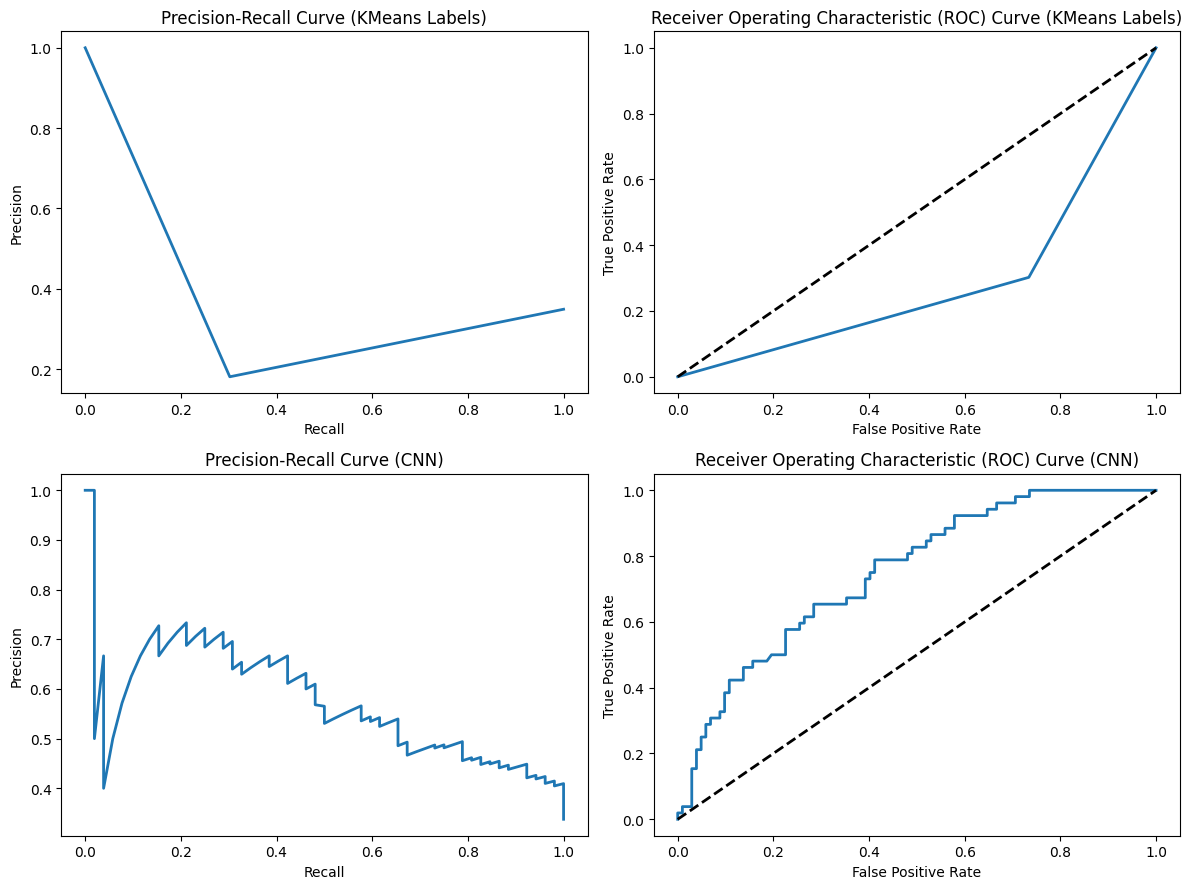

In [62]:
###K-Means with CNN with graphs


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Phase 1: KMeans Clustering
X_kmeans = df.drop('Outcome', axis=1)
scaler_kmeans = StandardScaler()
X_kmeans_scaled = scaler_kmeans.fit_transform(X_kmeans)

kmeans = KMeans(n_clusters=2, random_state=42, init='k-means++', n_init='warn', max_iter=300)
df['KMeans_Labels'] = kmeans.fit_predict(X_kmeans_scaled)

# Phase 2: CNN for binary classification
X_cnn = df.drop(['Outcome', 'KMeans_Labels'], axis=1)
y_cnn = df['Outcome']

# Standardize the features
scaler_cnn = StandardScaler()
X_cnn_scaled = scaler_cnn.fit_transform(X_cnn)

# Reshape the data for CNN input
X_cnn_reshaped = X_cnn_scaled.reshape((X_cnn_scaled.shape[0], X_cnn_scaled.shape[1], 1))

# Split the data into training, testing, and validation sets
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_cnn_reshaped, y_cnn, test_size=0.4, random_state=42
)
X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42
)

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

# Performance metrics for KMeans Labels
accuracy_kmeans = accuracy_score(df['Outcome'], df['KMeans_Labels'])
conf_matrix_kmeans = confusion_matrix(df['Outcome'], df['KMeans_Labels'])
classification_rep_kmeans = classification_report(df['Outcome'], df['KMeans_Labels'])

# Display performance metrics for KMeans Labels
print("Performance metrics for KMeans Labels:")
print(f'Accuracy: {accuracy_kmeans}')
print(f'Confusion Matrix:\n{conf_matrix_kmeans}')
print(f'Classification Report:\n{classification_rep_kmeans}')

# Precision-Recall Curve for KMeans Labels
precision_kmeans, recall_kmeans, _ = precision_recall_curve(df['Outcome'], df['KMeans_Labels'])
axes[0, 0].plot(recall_kmeans, precision_kmeans, lw=2, label='PR curve (KMeans Labels)')

# ROC Curve for KMeans Labels
fpr_kmeans, tpr_kmeans, _ = roc_curve(df['Outcome'], df['KMeans_Labels'])
roc_auc_kmeans = auc(fpr_kmeans, tpr_kmeans)
axes[0, 1].plot(fpr_kmeans, tpr_kmeans, lw=2, label=f'ROC curve (area = {roc_auc_kmeans:.2f}) (KMeans Labels)')

# Performance metrics for CNN
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_cnn_reshaped.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(units=50, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(units=1, activation='sigmoid'))
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, validation_data=(X_val_cnn, y_val_cnn))

# Evaluate the CNN model on the test set
y_pred_cnn_prob = model_cnn.predict(X_test_cnn)
y_pred_cnn = np.round(y_pred_cnn_prob).astype(int)

# Performance metrics for CNN
accuracy_cnn = accuracy_score(y_test_cnn, y_pred_cnn)
conf_matrix_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)
classification_rep_cnn = classification_report(y_test_cnn, y_pred_cnn)

# Display performance metrics for CNN
print("\nPerformance metrics for CNN:")
print(f'Accuracy: {accuracy_cnn}')
print(f'Confusion Matrix:\n{conf_matrix_cnn}')
print(f'Classification Report:\n{classification_rep_cnn}')

# Precision-Recall Curve for CNN
precision_cnn, recall_cnn, _ = precision_recall_curve(y_test_cnn, y_pred_cnn_prob)
axes[1, 0].plot(recall_cnn, precision_cnn, lw=2, label='PR curve (CNN)')

# ROC Curve for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_cnn, y_pred_cnn_prob)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
axes[1, 1].plot(fpr_cnn, tpr_cnn, lw=2, label=f'ROC curve (area = {roc_auc_cnn:.2f}) (CNN)')

# Adjust layout
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision-Recall Curve (KMeans Labels)')

axes[0, 1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve (KMeans Labels)')

axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve (CNN)')

axes[1, 1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('Receiver Operating Characteristic (ROC) Curve (CNN)')

# Show plots
plt.tight_layout()
plt.show()


In [63]:
df

,Pregnancies,Glucose,BloodPressure,Insulin,DiabetesPedigreeFunction,Outcome,KMeans_Labels
0,6,148.0,72.0,79.799479,0.627,1,0
1,1,85.0,66.0,79.799479,0.351,0,1
2,8,183.0,64.0,79.799479,0.672,1,0
3,1,89.0,66.0,94.000000,0.167,0,1
4,0,137.0,40.0,168.000000,2.288,1,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,180.000000,0.171,0,0
764,2,122.0,70.0,79.799479,0.340,0,1
765,5,121.0,72.0,112.000000,0.245,0,1
766,1,126.0,60.0,79.799479,0.349,1,1


In [64]:
#Alexnet

# Split the data into features and target
X_data = df.drop(columns=["Pregnancies", "Glucose",	"BloodPressure", "Outcome"], axis=1)
y_labels = df['Outcome']

label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(y_labels)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(y_labels)), activation='softmax')
])

learning_rate = 0.0001
batch_size = 64
epochs = 50
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

classification_rep = classification_report(y_test, y_pred_classes, target_names=['Healthy', 'Parkinsons'])
print('Classification Report:\n', classification_rep)

# Performance metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_classes)
conf_matrix_test = confusion_matrix(y_test, y_pred_classes)
classification_rep_test = classification_report(y_test, y_pred_classes)



# Display performance metrics for the test set
print("\nPerformance metrics for the Test Set:")
print(f'Accuracy: {accuracy_test}')
print(f'Confusion Matrix:\n{conf_matrix_test}')
print(f'Classification Report:\n{classification_rep_test}')



Epoch 1/50
8/8 [==============================] - 2s 37ms/step - loss: 0.6759 - accuracy: 0.6130 - val_loss: 0.6671 - val_accuracy: 0.6992
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6722 - accuracy: 0.6497 - val_loss: 0.6593 - val_accuracy: 0.6911
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6548 - accuracy: 0.6701 - val_loss: 0.6517 - val_accuracy: 0.6911
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.6552 - accuracy: 0.6619 - val_loss: 0.6450 - val_accuracy: 0.6992
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.6318 - accuracy: 0.6925 - val_loss: 0.6384 - val_accuracy: 0.6992
Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 0.6291 - accuracy: 0.7067 - val_loss: 0.6327 - val_accuracy: 0.7073
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6285 - accuracy: 0.6823 - val_loss: 0.6284 - val_accuracy: 0.6748
Epoch 8/50
8/8 [============

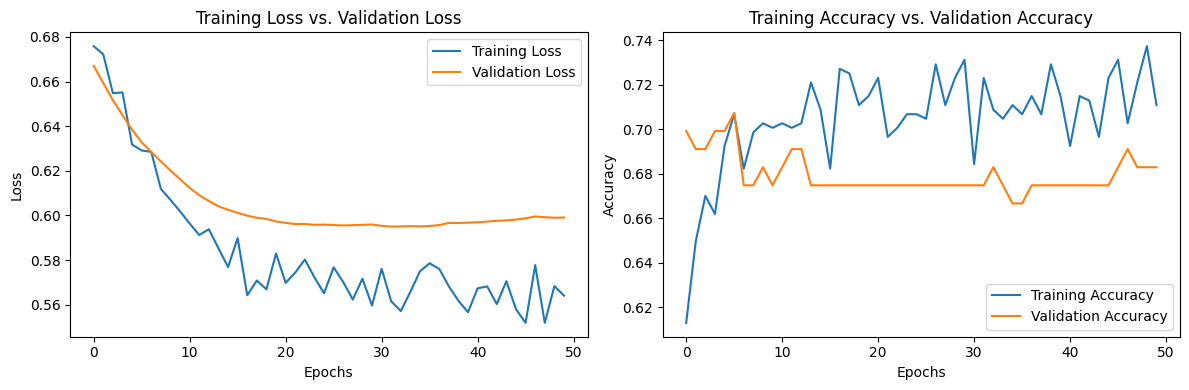

ROC AUC: 0.789623507805326
Confusion Matrix:
 [[82 17]
 [22 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        99
           1       0.66      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



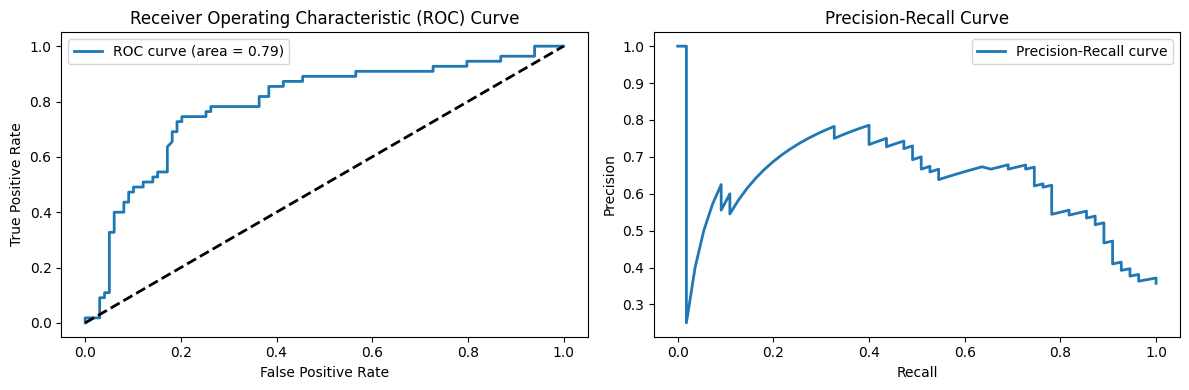

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_recall_curve
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Subplot 1: Training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot 2: Training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred[:, 1])

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display other metrics
print(f'ROC AUC: {roc_auc}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_report(y_test, y_pred_classes))

# Plot ROC and Precision-Recall curves on a single page
plt.figure(figsize=(12, 4))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')

# Subplot 2: Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [66]:
# Split the data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions on the validation set
y_pred_val = model.predict(X_val)

# Performance metrics
accuracy_val = accuracy_score(y_val, y_pred_val)
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
classification_rep_val = classification_report(y_val, y_pred_val)

# Predictions on the test set
y_pred_test = model.predict(X_test)

# Performance metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Display performance metrics for the validation set
print("Performance metrics for the Validation Set:")
print(f'Accuracy: {accuracy_val}')
print(f'Confusion Matrix:\n{conf_matrix_val}')
print(f'Classification Report:\n{classification_rep_val}')

# Display performance metrics for the test set
print("\nPerformance metrics for the Test Set:")
print(f'Accuracy: {accuracy_test}')
print(f'Confusion Matrix:\n{conf_matrix_test}')
print(f'Classification Report:\n{classification_rep_test}')

Performance metrics for the Validation Set:
Accuracy: 0.6688311688311688
Confusion Matrix:
[[73 31]
 [20 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       104
           1       0.49      0.60      0.54        50

    accuracy                           0.67       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.69      0.67      0.68       154


Performance metrics for the Test Set:
Accuracy: 0.6363636363636364
Confusion Matrix:
[[75 27]
 [29 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       102
           1       0.46      0.44      0.45        52

    accuracy                           0.64       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.63      0.64      0.63       154



In [67]:
# Split the data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Naive Bayes Classifier from scratch
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = None
        self.feature_params = None

    def fit(self, X, y):
        self.class_probs = {}
        self.feature_params = {}

        # Calculate class probabilities
        for label in np.unique(y):
            self.class_probs[label] = np.sum(y == label) / len(y)

        # Calculate mean and standard deviation for each feature in each class
        for label in np.unique(y):
            label_data = X[y == label]
            self.feature_params[label] = {
                'mean': np.mean(label_data, axis=0),
                'std': np.std(label_data, axis=0)
            }

    def predict(self, X):
        predictions = []
        for sample in X:
            probs = []
            for label, class_prob in self.class_probs.items():
                feature_probs = norm.pdf(sample, loc=self.feature_params[label]['mean'], scale=self.feature_params[label]['std'])
                class_prob *= np.prod(feature_probs)
                probs.append(class_prob)
            predictions.append(np.argmax(probs))
        return np.array(predictions)

# Instantiate and fit the Naive Bayes Classifier from scratch
nb_classifier_scratch = NaiveBayesClassifier()
nb_classifier_scratch.fit(X_train.values, y_train.values)

# Predictions on the validation set
y_pred_val_scratch = nb_classifier_scratch.predict(X_val.values)

# Performance metrics for Naive Bayes Classifier from scratch on the validation set
accuracy_val_scratch = accuracy_score(y_val, y_pred_val_scratch)
conf_matrix_val_scratch = confusion_matrix(y_val, y_pred_val_scratch)
classification_rep_val_scratch = classification_report(y_val, y_pred_val_scratch)

# Naive Bayes Classifier using built-in library (sklearn)
nb_classifier_sklearn = GaussianNB()
nb_classifier_sklearn.fit(X_train, y_train)

# Predictions on the validation set using sklearn
y_pred_val_sklearn = nb_classifier_sklearn.predict(X_val)

# Performance metrics for Naive Bayes Classifier using sklearn on the validation set
accuracy_val_sklearn = accuracy_score(y_val, y_pred_val_sklearn)
conf_matrix_val_sklearn = confusion_matrix(y_val, y_pred_val_sklearn)
classification_rep_val_sklearn = classification_report(y_val, y_pred_val_sklearn)

# Display performance metrics for Naive Bayes Classifier from scratch
print("Performance metrics for Naive Bayes Classifier from scratch on the Validation Set:")
print(f'Accuracy: {accuracy_val_scratch}')
print(f'Confusion Matrix:\n{conf_matrix_val_scratch}')
print(f'Classification Report:\n{classification_rep_val_scratch}')

# Display performance metrics for Naive Bayes Classifier using sklearn
print("\nPerformance metrics for Naive Bayes Classifier using sklearn on the Validation Set:")
print(f'Accuracy: {accuracy_val_sklearn}')
print(f'Confusion Matrix:\n{conf_matrix_val_sklearn}')
print(f'Classification Report:\n{classification_rep_val_sklearn}')

Performance metrics for Naive Bayes Classifier from scratch on the Validation Set:
Accuracy: 0.7662337662337663
Confusion Matrix:
[[79 25]
 [11 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       104
           1       0.61      0.78      0.68        50

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.75       154
weighted avg       0.79      0.77      0.77       154


Performance metrics for Naive Bayes Classifier using sklearn on the Validation Set:
Accuracy: 0.7662337662337663
Confusion Matrix:
[[79 25]
 [11 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       104
           1       0.61      0.78      0.68        50

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.75       154
weighted avg       0.79      0.77      0.77       154



In [68]:
# Split the data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Bayesian Classifier using built-in library (sklearn)
bayesian_classifier_sklearn = GaussianNB()
bayesian_classifier_sklearn.fit(X_train, y_train)

# Predictions on the validation set using sklearn
y_pred_val_sklearn = bayesian_classifier_sklearn.predict(X_val)

# Performance metrics for Bayesian Classifier using sklearn on the validation set
accuracy_val_sklearn = accuracy_score(y_val, y_pred_val_sklearn)
conf_matrix_val_sklearn = confusion_matrix(y_val, y_pred_val_sklearn)
classification_rep_val_sklearn = classification_report(y_val, y_pred_val_sklearn)

# Display performance metrics for Bayesian Classifier from scratch
print("Performance metrics for Bayesian Classifier from scratch on the Validation Set:")
print(f'Accuracy: {accuracy_val_scratch}')
print(f'Confusion Matrix:\n{conf_matrix_val_scratch}')
print(f'Classification Report:\n{classification_rep_val_scratch}')

# Display performance metrics for Bayesian Classifier using sklearn
print("\nPerformance metrics for Bayesian Classifier using sklearn on the Validation Set:")
print(f'Accuracy: {accuracy_val_sklearn}')
print(f'Confusion Matrix:\n{conf_matrix_val_sklearn}')
print(f'Classification Report:\n{classification_rep_val_sklearn}')

Performance metrics for Bayesian Classifier from scratch on the Validation Set:
Accuracy: 0.7662337662337663
Confusion Matrix:
[[79 25]
 [11 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       104
           1       0.61      0.78      0.68        50

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.75       154
weighted avg       0.79      0.77      0.77       154


Performance metrics for Bayesian Classifier using sklearn on the Validation Set:
Accuracy: 0.7662337662337663
Confusion Matrix:
[[79 25]
 [11 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       104
           1       0.61      0.78      0.68        50

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.75       154
weighted avg       0.79      0.77      0.77       154



In [69]:
# Split the data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Perform KMeans clustering (K=2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels as a new column in the data
X_clustered = np.column_stack((X, cluster_labels))

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X_clustered, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Extract features, cluster labels, and labels from the clustered data
X_train_features, X_train_clusters = X_train[:, :5], X_train[:, 5]
X_val_features, X_val_clusters = X_val[:, :5], X_val[:, 5]
X_test_features, X_test_clusters = X_test[:, :5], X_test[:, 5]

# Train a KNN classifier on the clustered data
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_clusters.reshape(-1, 1), y_train)

# Predict on validation set
y_val_pred = knn_classifier.predict(X_val_clusters.reshape(-1, 1))

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)

# Predict on test set
y_test_pred = knn_classifier.predict(X_test_clusters.reshape(-1, 1))

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Display performance metrics
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:\n", classification_report_val)

print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:\n", classification_report_test)

Validation Accuracy: 0.6782608695652174
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        78
           1       0.00      0.00      0.00        37

    accuracy                           0.68       115
   macro avg       0.34      0.50      0.40       115
weighted avg       0.46      0.68      0.55       115


Test Accuracy: 0.6293103448275862
Test Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77        73
           1       0.00      0.00      0.00        43

    accuracy                           0.63       116
   macro avg       0.31      0.50      0.39       116
weighted avg       0.40      0.63      0.49       116



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif